In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/The-Grand-Complete-Data-Science-Materials/refs/heads/main/Machine%20Learning/2-Complete%20Linear%20Regression/Practicals/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
## drop unnecessary columns
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [10]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

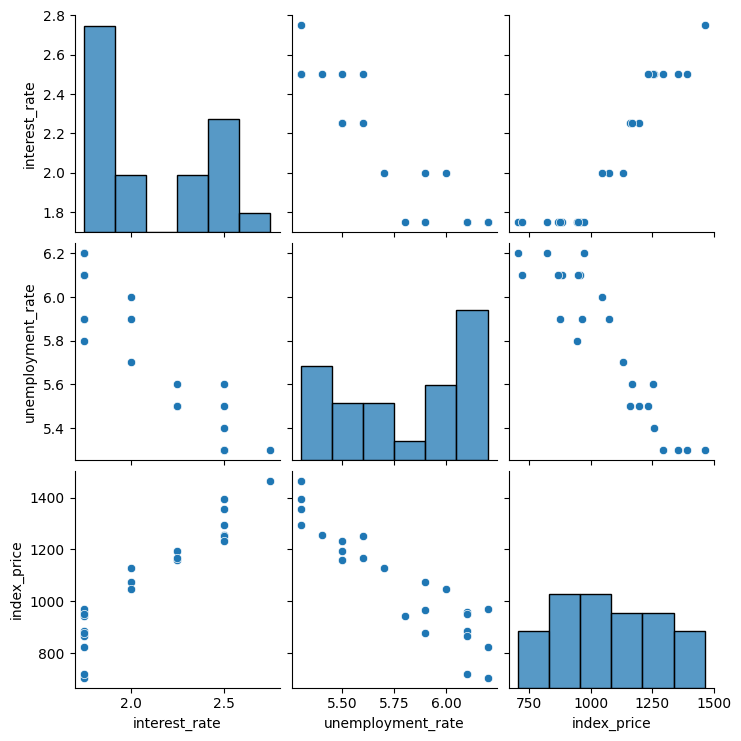

In [12]:
## visualizations
import seaborn as sns

sns.pairplot(df)

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

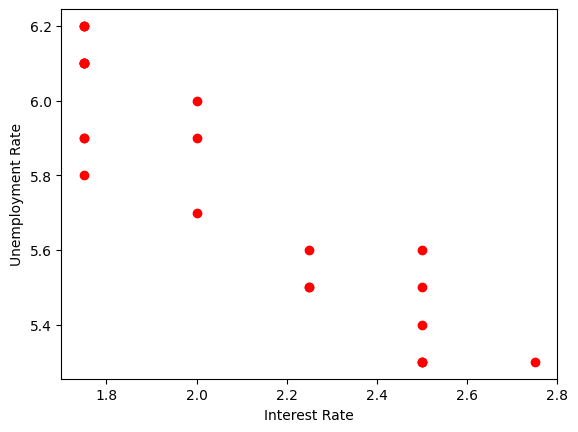

In [15]:
## visualize the datapoint more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [16]:
## independent and dependent features

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

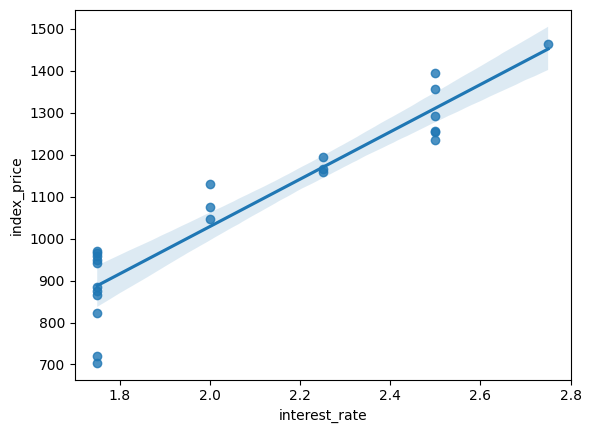

In [20]:
sns.regplot(df, x='interest_rate', y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

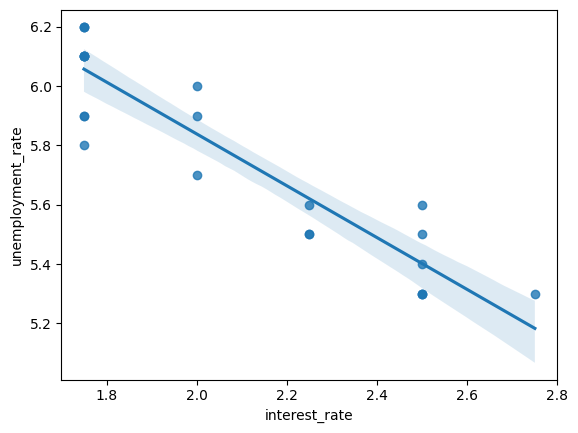

In [21]:
sns.regplot(df, x='interest_rate', y='unemployment_rate')

In [22]:
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [25]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [28]:
## prediction

y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [29]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 5793.762887712569
MAE: 59.935781523235484
RMSE: 76.11677139574805


In [30]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.8278978091457145


In [31]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7131630152428576

## Assumptions

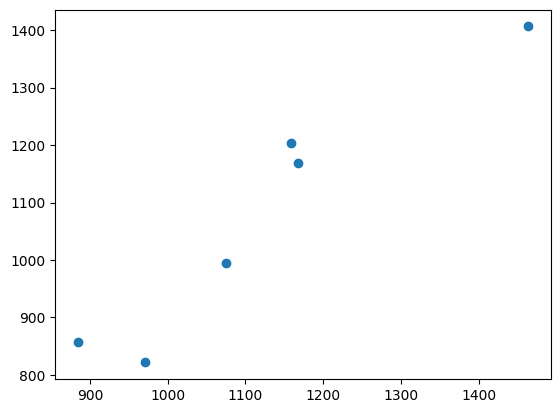

In [32]:
plt.scatter(y_test, y_pred)

In [34]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


<Axes: xlabel='index_price', ylabel='Density'>

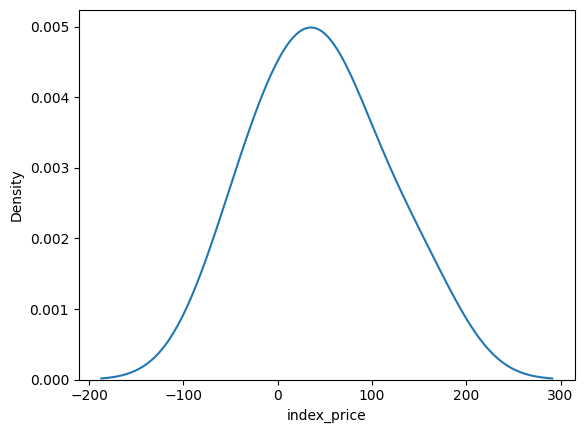

In [ ]:
# plot the residuals
sns.kdeplot(residuals)

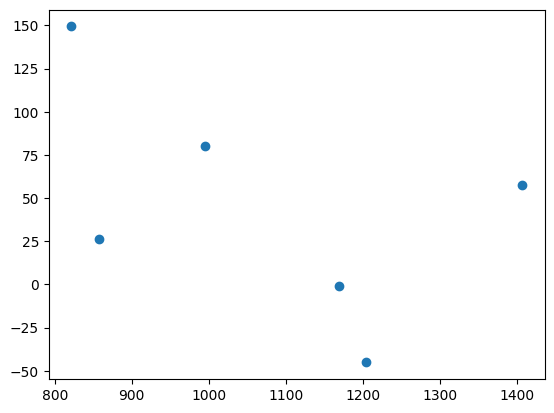

In [37]:
## scatter plot with residuasl and prediction
plt.scatter(y_pred, residuals)

In [38]:
## OLS Linear Regression
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 02 May 2025   Prob (F-statistic):                       0.754
Time:                        02:46:31   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [40]:
print(f"Coefficient or slope: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coefficient or slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443
